# Time-series Stock Data

##### Notebook setup

In [1]:
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

C:\Users\quantum\Anaconda\lib\site-packages\pandas\io\data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [2]:
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5]

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
2012-01-03  26.55  26.96  26.39  26.77  64731500     24.105
2012-01-04  26.82  27.47  26.78  27.40  80516100     24.672
2012-01-05  27.38  27.73  27.29  27.68  56081400     24.925
2012-01-06  27.53  28.19  27.53  28.11  99455500     25.312
2012-01-09  28.05  28.10  27.72  27.74  59706800     24.979

In [3]:
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', start, end)
    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker','Date'])

In [4]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5]

                     Open    High     Low   Close    Volume  Adj Close
Ticker Date                                                           
AAPL   2012-01-03  409.40  412.50  409.00  411.23  75555200     54.934
       2012-01-04  410.00  414.68  409.28  413.44  65005500     55.230
       2012-01-05  414.95  418.55  412.67  418.03  67817400     55.843
       2012-01-06  419.77  422.75  419.22  422.40  79573200     56.427
       2012-01-09  425.50  427.75  421.35  421.73  98506100     56.337

In [5]:
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5]

               Open     High      Low    Close      Volume  Adj Close
Date                                                                 
2012-01-03  1258.86  1284.62  1258.86  1277.06  3943710000    1277.06
2012-01-04  1277.03  1278.73  1268.10  1277.30  3592580000    1277.30
2012-01-05  1277.30  1283.05  1265.26  1281.06  4315950000    1281.06
2012-01-06  1280.93  1281.84  1273.34  1277.81  3656830000    1277.81
2012-01-09  1277.83  1281.99  1274.55  1280.70  3371600000    1280.70

#### Plotting closing prices

In [6]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5]

  Ticker       Date  Adj Close
0   AAPL 2012-01-03     54.934
1   AAPL 2012-01-04     55.230
2   AAPL 2012-01-05     55.843
3   AAPL 2012-01-06     56.427
4   AAPL 2012-01-09     56.337

In [7]:
daily_close_px = just_closing_prices.pivot('Date', 'Ticker',
'Adj Close')

In [8]:
daily_close_px[:5]

Ticker         AA    AAPL    DAL  ...      MSFT     PEP    UAL
Date                              ...                         
2012-01-03  8.846  54.934  7.879  ...    24.105  59.540  18.90
2012-01-04  9.057  55.230  7.849  ...    24.672  59.845  18.52
2012-01-05  8.971  55.843  8.163  ...    24.925  59.379  18.39
2012-01-06  8.779  56.427  8.153  ...    25.312  58.634  18.21
2012-01-09  9.038  56.337  8.114  ...    24.979  58.939  17.93

[5 rows x 9 columns]

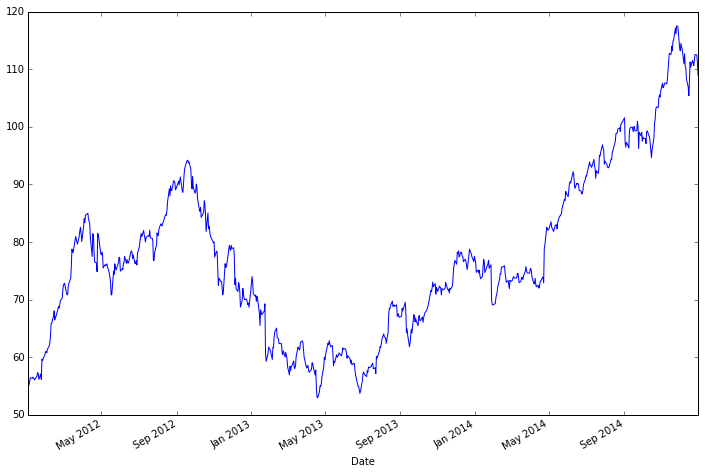

In [9]:
_ = daily_close_px['AAPL'].plot(figsize=(12,8))

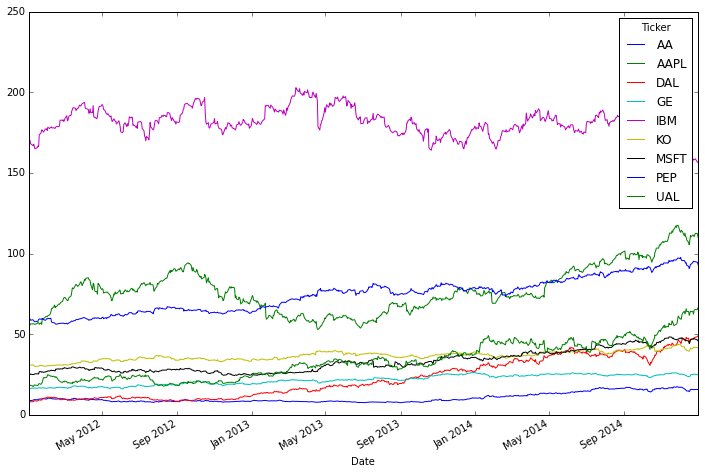

In [10]:
_ = daily_close_px.plot(figsize=(12,8));

#### Plotting volume-series data

In [11]:
msftV = all_data.Volume.loc['MSFT']

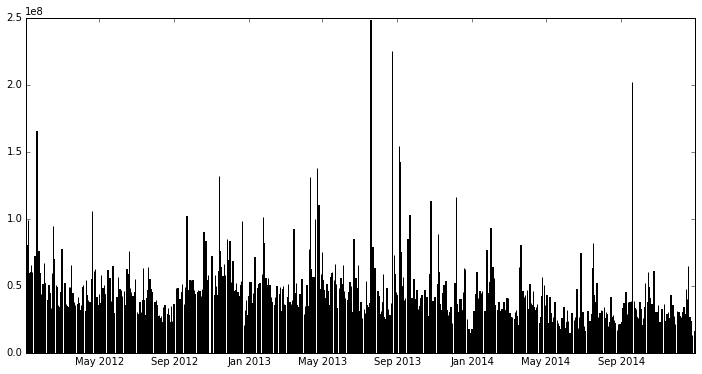

In [12]:
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)

#### Combined price and volumes

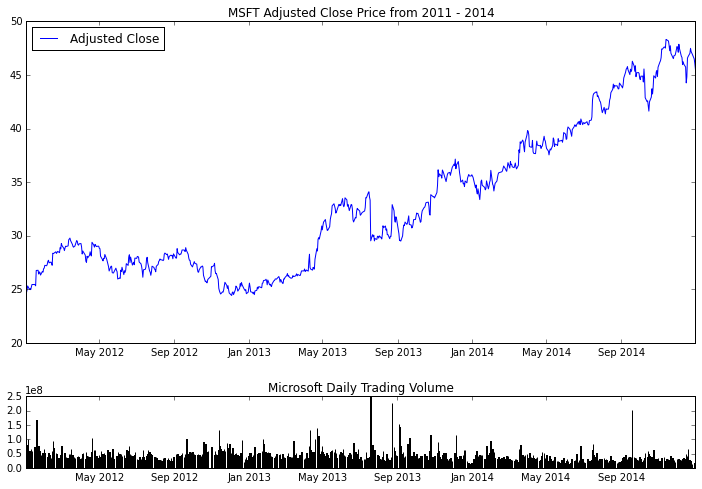

In [13]:
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.plot(daily_close_px.index,daily_close_px['MSFT'],label='Adjusted Close')
plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

#### Plotting candlesticks

In [14]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] .reset_index()
subset[:5]

        Date   Open   High    ...      Close    Volume  Adj Close
0 2014-12-01  47.88  48.78    ...      48.62  31191600     47.650
1 2014-12-02  48.84  49.05    ...      48.46  25743000     47.494
2 2014-12-03  48.44  48.50    ...      48.08  23534800     47.121
3 2014-12-04  48.39  49.06    ...      48.84  30320400     47.866
4 2014-12-05  48.82  48.97    ...      48.42  27313400     47.454

[5 rows x 7 columns]

In [15]:
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

        Date   Open   High    ...       Volume  Adj Close  date_num
0 2014-12-01  47.88  48.78    ...     31191600     47.650    735568
1 2014-12-02  48.84  49.05    ...     25743000     47.494    735569
2 2014-12-03  48.44  48.50    ...     23534800     47.121    735570
3 2014-12-04  48.39  49.06    ...     30320400     47.866    735571
4 2014-12-05  48.82  48.97    ...     27313400     47.454    735572

[5 rows x 8 columns]

In [16]:
subset_as_tuples = [tuple(x) for x in subset[['date_num',
'Open',
'High',
'Low',
'Close']].values]
subset_as_tuples

[(735568.0, 47.880001, 48.779998999999997, 47.709998999999996, 48.619999),
 (735569.0, 48.840000000000003, 49.049999, 48.200001, 48.459998999999996),
 (735570.0, 48.439999, 48.5, 47.810001, 48.080002),
 (735571.0, 48.389998999999996, 49.060001, 48.200001, 48.840000000000003),
 (735572.0, 48.82, 48.970001000000003, 48.380001, 48.419998),
 (735575.0, 48.259997999999996, 48.349997999999999, 47.450001, 47.700001),
 (735576.0, 47.110001000000004, 47.919998, 47.049999, 47.590000000000003),
 (735577.0, 47.580002, 47.659999999999997, 46.700001, 46.900002000000001),
 (735578.0, 47.080002, 47.740002000000004, 46.68, 47.169998),
 (735579.0, 46.779998999999997, 47.729999999999997, 46.669998, 46.950001),
 (735582.0, 47.200001, 47.669998, 46.549999, 46.669998),
 (735583.0,
  45.900002000000001,
  46.340000000000003,
  45.130001,
  45.159999999999997),
 (735584.0, 45.049999, 45.950001, 44.900002000000001, 45.740002000000004),
 (735585.0,
  46.580002,
  47.520000000000003,
  46.340000000000003,
  47.5

In [17]:
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d') # e.g., Jan 12

In [18]:
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

([<matplotlib.lines.Line2D at 0xa7abb90>,
  <matplotlib.patches.Rectangle at 0x8b16f10>])

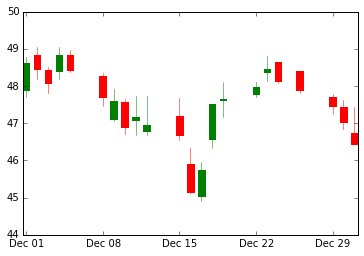

In [19]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
from matplotlib.finance import candlestick_ohlc
candlestick_ohlc(ax, subset_as_tuples, width=0.6,
colorup='g',colordown='r')

#### Calculating simple daily percentage change

In [20]:
dpc_1 = daily_close_px.iloc[1:] / daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL'][:5]

Ticker         AA   AAPL
Date                    
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002
2012-01-10  0.001  0.004

In [21]:
price_matrix_minus_day1 = daily_close_px.iloc[1:]
price_matrix_minus_day1[:5]

Ticker         AA    AAPL    DAL  ...      MSFT     PEP    UAL
Date                              ...                         
2012-01-04  9.057  55.230  7.849  ...    24.672  59.845  18.52
2012-01-05  8.971  55.843  8.163  ...    24.925  59.379  18.39
2012-01-06  8.779  56.427  8.153  ...    25.312  58.634  18.21
2012-01-09  9.038  56.337  8.114  ...    24.979  58.939  17.93
2012-01-10  9.047  56.539  8.104  ...    25.069  58.876  17.48

[5 rows x 9 columns]

In [22]:
daily_close_px.iloc[:-1].values

array([[   8.846023,   54.934465,    7.878849, ...,   24.105181,
          59.539945,   18.9     ],
       [   9.056871,   55.229691,    7.849451, ...,   24.672467,
          59.844815,   18.52    ],
       [   8.970615,   55.842847,    8.163037, ...,   24.924595,
          59.378541,   18.389999],
       ..., 
       [  15.708264,  112.560096,   48.053324, ...,   46.925247,
          94.961774,   65.279999],
       [  15.708264,  112.481106,   48.44061 , ...,   46.503821,
          94.64866 ,   65.220001],
       [  15.738053,  111.108535,   48.88748 , ...,   46.082396,
          93.895224,   66.050003]])

In [23]:
dpc_2 = daily_close_px / daily_close_px.shift(1) - 1
dpc_2.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [24]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.ix[:,0:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03    NaN    NaN
2012-01-04  0.024  0.005
2012-01-05 -0.010  0.011
2012-01-06 -0.021  0.010
2012-01-09  0.029 -0.002

In [25]:
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.ix[:5,:5]

Ticker         AA   AAPL    DAL         GE    IBM
Date                                             
2012-01-03  0.000  0.000  0.000  0.000e+00  0.000
2012-01-04  0.024  0.005 -0.004  1.089e-02 -0.004
2012-01-05 -0.010  0.011  0.040 -5.388e-04 -0.005
2012-01-06 -0.021  0.010 -0.001  5.391e-03 -0.011
2012-01-09  0.029 -0.002 -0.005  1.126e-02 -0.005

#### Calculating simple daily cumulative returns

In [26]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker         AA   AAPL
Date                    
2012-01-03  1.000  1.000
2012-01-04  1.024  1.005
2012-01-05  1.014  1.017
2012-01-06  0.992  1.027
2012-01-09  1.022  1.026

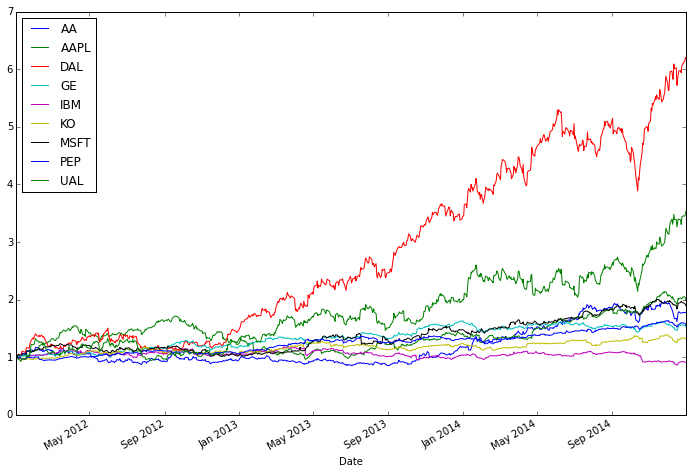

In [27]:
cum_daily_return.plot(figsize=(12,8))
plt.legend(loc=2);

## Analyzing the distribution of returns

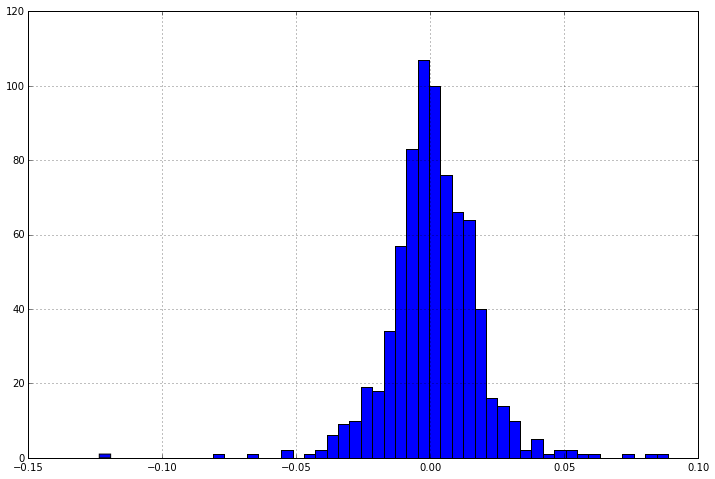

In [28]:
aapl = daily_pct_change['AAPL']
aapl.hist(bins=50, figsize=(12,8));

In [29]:
aapl.describe()

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
25%     -7.365e-03
50%      4.987e-04
75%      1.095e-02
max      8.874e-02
Name: AAPL, dtype: float64

In [30]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
2.5%    -3.191e-02
50%      4.987e-04
97.5%    3.171e-02
max      8.874e-02
Name: AAPL, dtype: float64

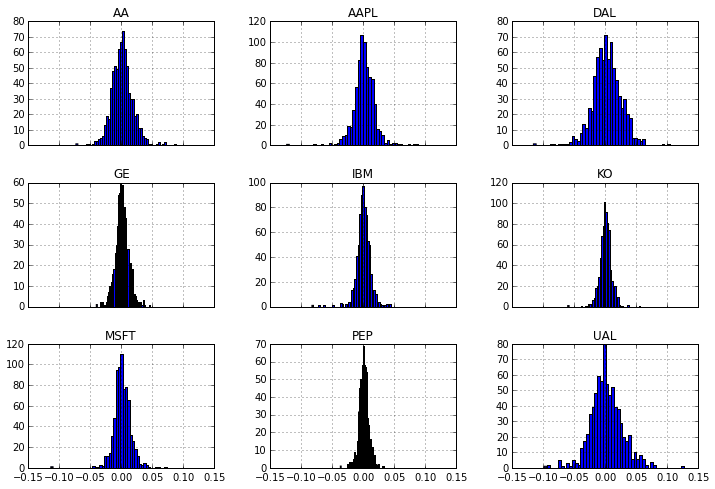

In [31]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));

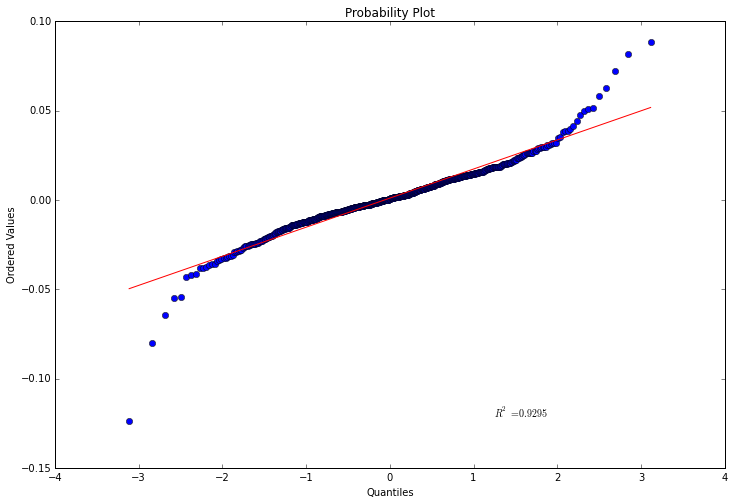

In [32]:
import scipy.stats as stats
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show();

##### http://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

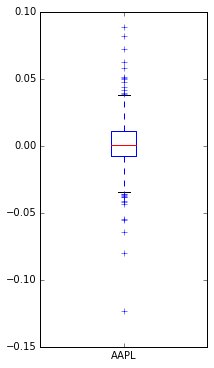

In [33]:
daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6))

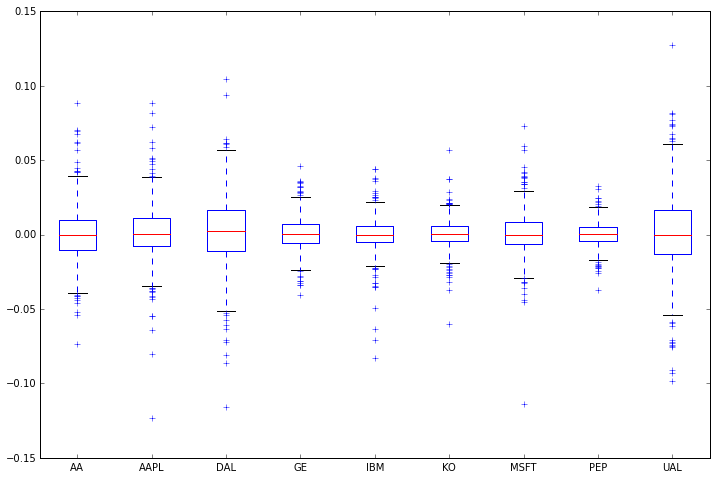

In [34]:
daily_pct_change.plot(kind='box', figsize=(12,8))

##### http://pandas.pydata.org/pandas-docs/stable/visualization.html

## Comparison of daily percentage change between stocks

In [35]:
def render_scatter_plot(data, x_stock_name,
    y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10, 10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

C:\Users\quantum\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


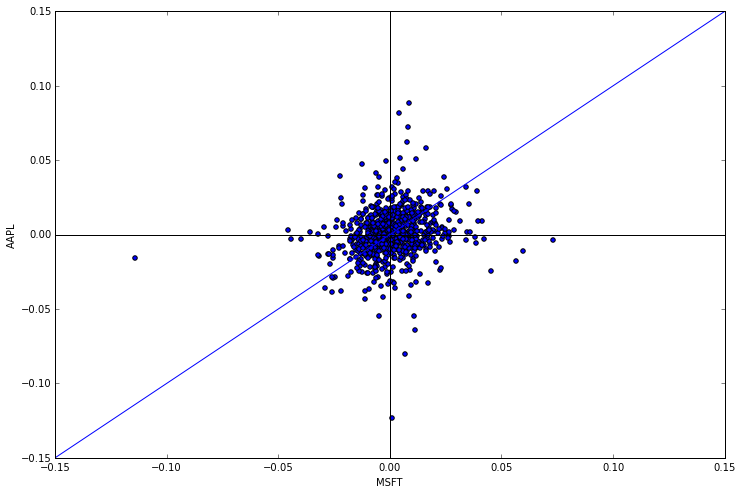

In [36]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'MSFT', 'AAPL', xlim=limits)


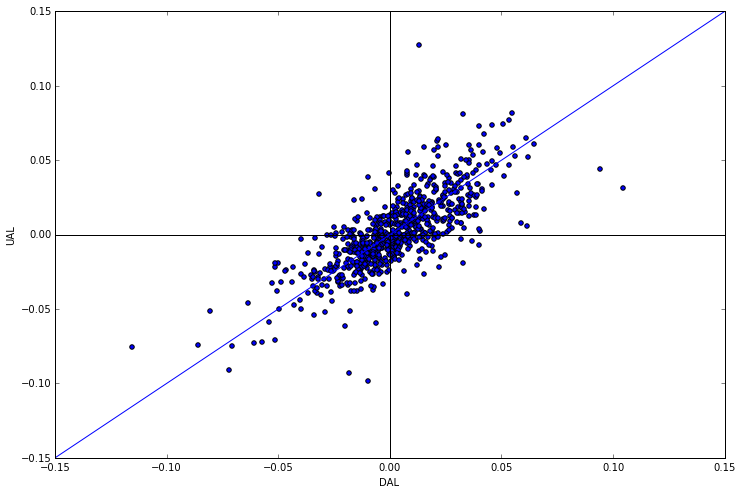

In [37]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)


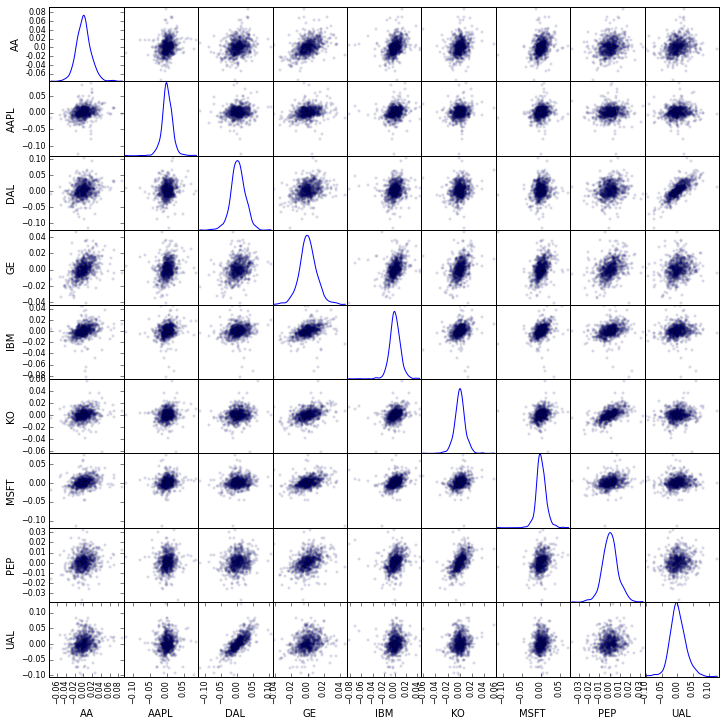

In [38]:
# all stocks against each other, with a KDE in the diagonal
_ = pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12));

### Moving windows

In [39]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    24.105
2012-01-04    24.672
2012-01-05    24.925
2012-01-06    25.312
2012-01-09    24.979
Name: Adj Close, dtype: float64

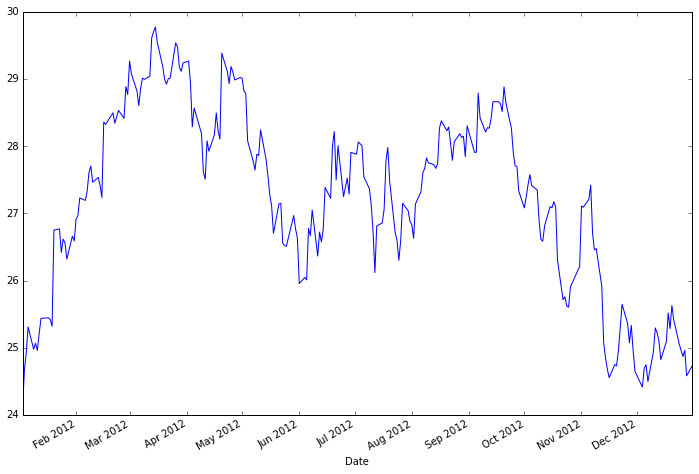

In [40]:
sample = msftAC['2012']
sample.plot(figsize=(12,8));

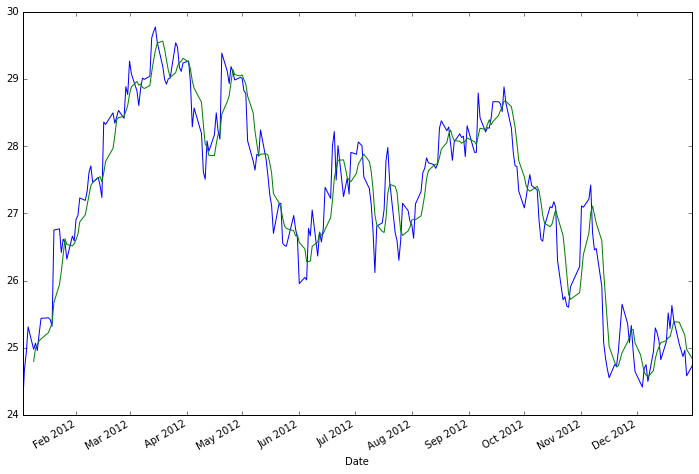

In [41]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8));

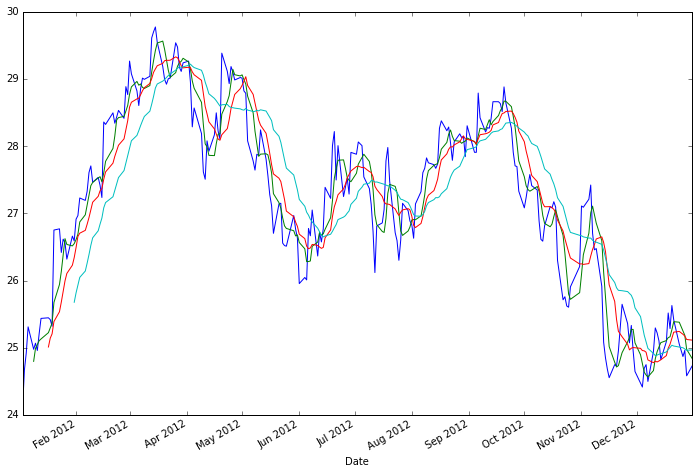

In [42]:
sample.plot(figsize=(12,8))
pd.rolling_mean(sample, 5).plot(figsize=(12,8))
pd.rolling_mean(sample, 10).plot(figsize=(12,8))
pd.rolling_mean(sample, 20).plot(figsize=(12,8));

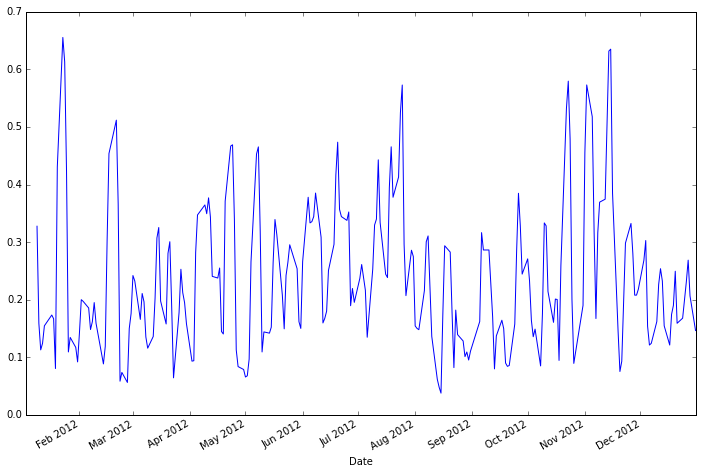

In [43]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));

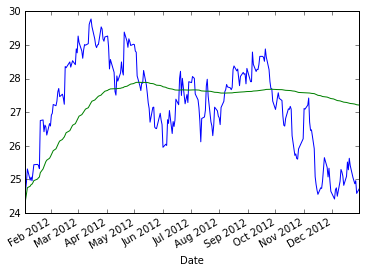

In [44]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x),
min_periods=1)
sample.plot()
pd.expanding_mean(sample).plot();

## Volatility calculation

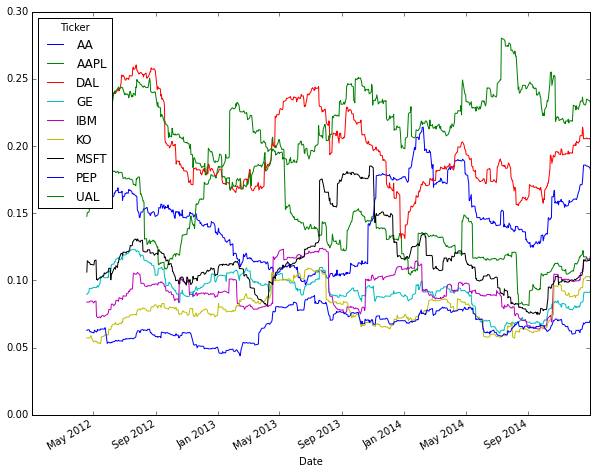

In [45]:
min_periods = 75
vol = pd.rolling_std(daily_pct_change, min_periods) * np.sqrt(min_periods)
vol.plot(figsize=(10, 8));

## Rolling correlation of returns

In [46]:
rolling_corr = pd.rolling_corr(daily_pct_change['AAPL'],
daily_pct_change['MSFT'],
window=252).dropna()
rolling_corr[251:] #first 251 are NaN

Date
2014-01-02    0.079
2014-01-03    0.078
2014-01-06    0.069
2014-01-07    0.068
2014-01-08    0.066
              ...  
2014-12-24    0.232
2014-12-26    0.230
2014-12-29    0.230
2014-12-30    0.232
2014-12-31    0.237
dtype: float64

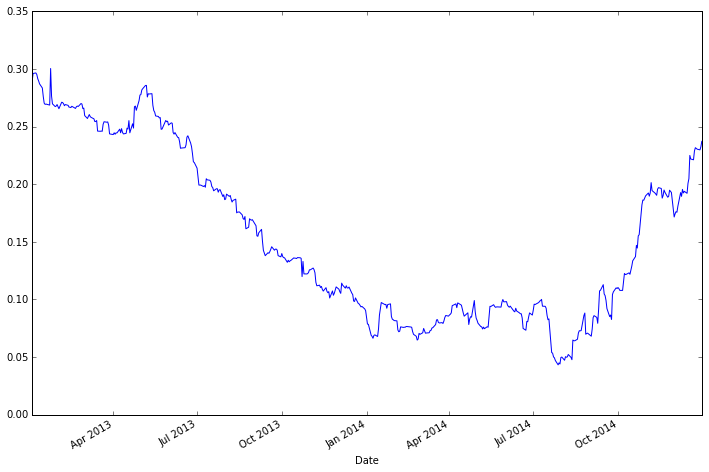

In [47]:
rolling_corr.plot(figsize=(12,8))

## Least-squares regression of returns

In [48]:
model = pd.ols(y=daily_pct_change['AAPL'],
x={'MSFT': daily_pct_change['MSFT']},window=250)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.0539
Adj R-squared:     0.0501

Rmse:              0.0132

F-stat (1, 248):    14.1193, p-value:     0.0002

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.2625     0.0699       3.76     0.0002     0.1256     0.3994
     intercept     0.0013     0.0008       1.56     0.1195    -0.0003     0.0030
---------------------------------End of Summary---------------------------------

In [49]:
model.beta[0:5] # what is the beta?

             MSFT  intercept
Date                        
2012-12-31  0.395      0.001
2013-01-02  0.408      0.001
2013-01-03  0.414      0.001
2013-01-04  0.422      0.001
2013-01-07  0.421      0.001

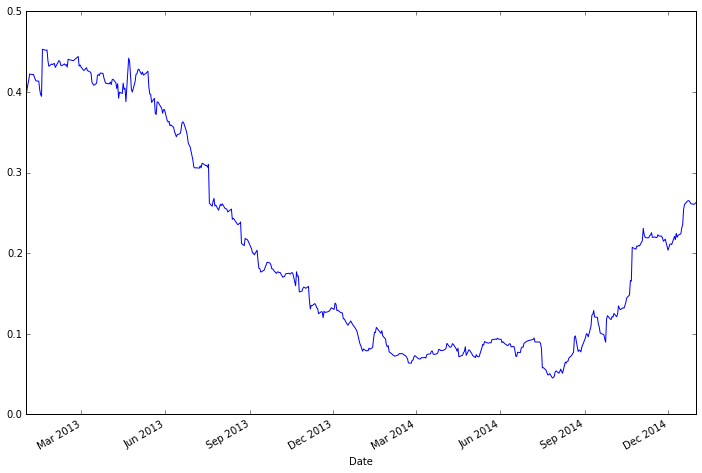

In [50]:
_ = model.beta['MSFT'].plot(figsize=(12, 8)); # plot the beta

# Comparing stocks to the S&P 500

In [51]:
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.000e+00
2012-01-04    1.879e-04
2012-01-05    2.944e-03
2012-01-06   -2.537e-03
2012-01-09    2.262e-03
Name: Adj Close, dtype: float64

In [52]:
sp_500_dpc = sp_500['Adj Close'].pct_change().fillna(0)
sp_500_dpc[:5]

Date
2012-01-03    0.000e+00
2012-01-04    1.879e-04
2012-01-05    2.944e-03
2012-01-06   -2.537e-03
2012-01-09    2.262e-03
Name: Adj Close, dtype: float64

In [53]:
dpc_all = pd.concat([sp_500_dpc, daily_pct_change], axis=1)
dpc_all.rename(columns={'Adj Close': 'SP500'}, inplace=True)
dpc_all[:5]

                SP500     AA   AAPL  ...     MSFT    PEP    UAL
Date                                 ...                       
2012-01-03  0.000e+00  0.000  0.000  ...    0.000  0.000  0.000
2012-01-04  1.879e-04  0.024  0.005  ...    0.024  0.005 -0.020
2012-01-05  2.944e-03 -0.010  0.011  ...    0.010 -0.008 -0.007
2012-01-06 -2.537e-03 -0.021  0.010  ...    0.016 -0.013 -0.010
2012-01-09  2.262e-03  0.029 -0.002  ...   -0.013  0.005 -0.015

[5 rows x 10 columns]

In [54]:
cdr_all = (1 + dpc_all).cumprod()
cdr_all[:5]

            SP500     AA   AAPL  ...     MSFT    PEP    UAL
Date                             ...                       
2012-01-03  1.000  1.000  1.000  ...    1.000  1.000  1.000
2012-01-04  1.000  1.024  1.005  ...    1.024  1.005  0.980
2012-01-05  1.003  1.014  1.017  ...    1.034  0.997  0.973
2012-01-06  1.001  0.992  1.027  ...    1.050  0.985  0.963
2012-01-09  1.003  1.022  1.026  ...    1.036  0.990  0.949

[5 rows x 10 columns]

In [55]:
dpc_corrs = dpc_all.corr()
dpc_corrs

       SP500     AA   AAPL  ...     MSFT    PEP    UAL
SP500  1.000  0.599  0.411  ...    0.536  0.521  0.325
AA     0.599  1.000  0.237  ...    0.310  0.226  0.221
AAPL   0.411  0.237  1.000  ...    0.188  0.092  0.062
DAL    0.419  0.251  0.135  ...    0.150  0.175  0.761
GE     0.728  0.458  0.239  ...    0.342  0.382  0.238
IBM    0.532  0.311  0.211  ...    0.357  0.258  0.124
KO     0.528  0.228  0.161  ...    0.271  0.557  0.139
MSFT   0.536  0.310  0.188  ...    1.000  0.284  0.127
PEP    0.521  0.226  0.092  ...    0.284  1.000  0.130
UAL    0.325  0.221  0.062  ...    0.127  0.130  1.000

[10 rows x 10 columns]

In [56]:
dpc_corrs.ix['SP500']

SP500    1.000
AA       0.599
AAPL     0.411
DAL      0.419
GE       0.728
IBM      0.532
KO       0.528
MSFT     0.536
PEP      0.521
UAL      0.325
Name: SP500, dtype: float64

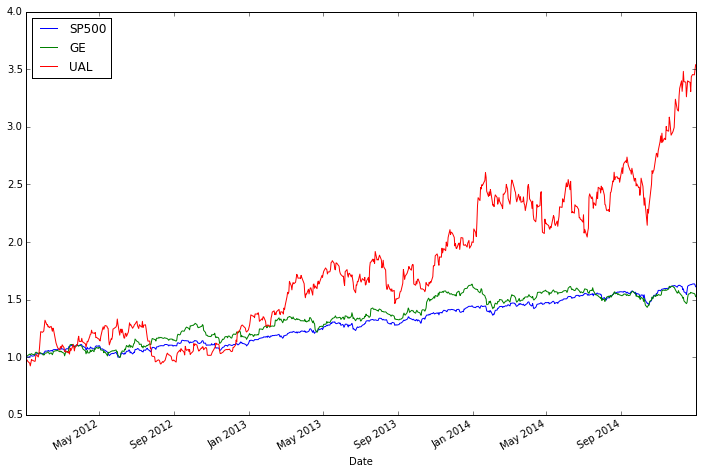

In [57]:
_ = cdr_all[['SP500', 'GE', 'UAL']].plot(figsize=(12,8));

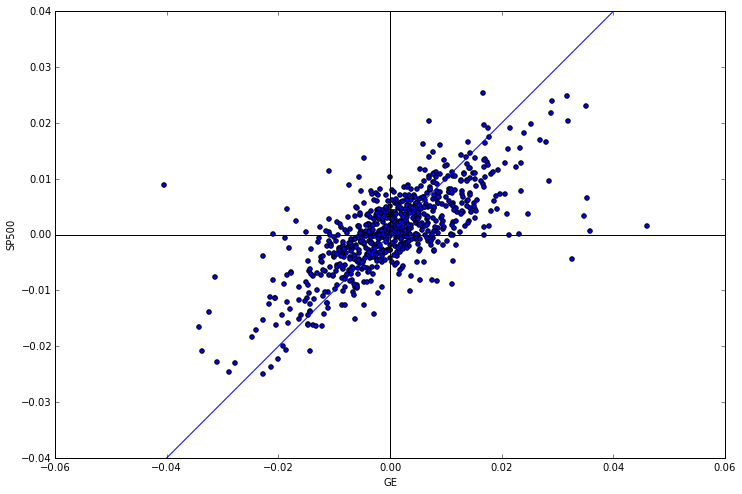

In [58]:
render_scatter_plot(dpc_all, 'GE', 'SP500')
plt.savefig('5104_05_23.png', bbox_inches='tight', dpi=300)

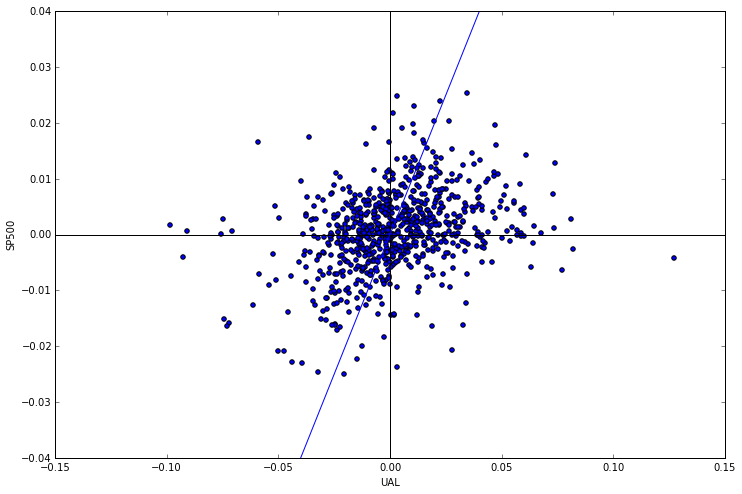

In [59]:
render_scatter_plot(dpc_all, 'UAL', 'SP500')

Chapter6 Trading Using Google Trends

##### http://www.nature.com/articles/srep01684

In [60]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web

In [61]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

In [62]:
%matplotlib inline

### Data collection

In [63]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ',parse_dates=[0,1,100,101])
paper[:5]

  Google Start Date Google End Date      arts   banking         ...          \
0        2004-01-04      2004-01-10  0.956667  0.193333         ...           
1        2004-01-11      2004-01-17  0.970000  0.203333         ...           
2        2004-01-18      2004-01-24  0.926667  0.196667         ...           
3        2004-01-25      2004-01-31  0.950000  0.196667         ...           
4        2004-02-01      2004-02-07  0.893333  0.203333         ...           

     water    world  DJIA Date  DJIA Closing Price  
0  1.91333  4.83333 2004-01-12            10485.18  
1  1.93333  4.76667 2004-01-20            10528.66  
2  1.89333  4.60000 2004-01-26            10702.51  
3  1.92000  4.53333 2004-02-02            10499.18  
4  1.88667  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]

In [64]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],'debt': paper['debt'].astype(np.float64),
'DJIADate': paper['DJIA Date'],'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

In [65]:
data[:5]

   DJIAClose   DJIADate   GoogleWE      debt
0   10485.18 2004-01-12 2004-01-10  0.210000
1   10528.66 2004-01-20 2004-01-17  0.210000
2   10702.51 2004-01-26 2004-01-24  0.210000
3   10499.18 2004-02-02 2004-01-31  0.213333
4   10579.03 2004-02-09 2004-02-07  0.200000

#### Gathering our own DJIA data from Quandl

In [99]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas.io.data as web
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)
%matplotlib inline


In [100]:
paper = pd.read_csv('PreisMoatStanley2013.dat',delimiter=' ',parse_dates=[0,1,100,101])
paper[:5]

  Google Start Date Google End Date      arts   banking         ...          \
0        2004-01-04      2004-01-10  0.956667  0.193333         ...           
1        2004-01-11      2004-01-17  0.970000  0.203333         ...           
2        2004-01-18      2004-01-24  0.926667  0.196667         ...           
3        2004-01-25      2004-01-31  0.950000  0.196667         ...           
4        2004-02-01      2004-02-07  0.893333  0.203333         ...           

     water    world  DJIA Date  DJIA Closing Price  
0  1.91333  4.83333 2004-01-12            10485.18  
1  1.93333  4.76667 2004-01-20            10528.66  
2  1.89333  4.60000 2004-01-26            10702.51  
3  1.92000  4.53333 2004-02-02            10499.18  
4  1.88667  4.53333 2004-02-09            10579.03  

[5 rows x 102 columns]

In [101]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],'debt': paper['debt'].astype(np.float64),
'DJIADate': paper['DJIA Date'],'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

data[:5]

   DJIAClose   DJIADate   GoogleWE      debt
0   10485.18 2004-01-12 2004-01-10  0.210000
1   10528.66 2004-01-20 2004-01-17  0.210000
2   10702.51 2004-01-26 2004-01-24  0.210000
3   10499.18 2004-02-02 2004-01-31  0.213333
4   10579.03 2004-02-09 2004-02-07  0.200000

In [102]:
import Quandl

In [134]:
djia = Quandl.get("YAHOO/INDEX_DJI",trim_start='2004-01-01',trim_end='2011-03-05')

In [135]:
djia[:5]

               Open     High      Low    Close   Volume  Adjusted Close
Date                                                                   
2004-01-02  10452.7  10527.0  10384.3  10409.9  1688900         10409.9
2004-01-05  10411.9  10544.1  10411.9  10544.1  2212900         10544.1
2004-01-06  10543.9  10549.2  10499.9  10538.7  1914600         10538.7
2004-01-07  10535.5  10539.5  10466.3  10529.0  2254900         10529.0
2004-01-08  10530.1  10592.6  10530.1  10592.4  2377700         10592.4

In [136]:
djia_closes = djia['Close'].reset_index()
djia_closes[:3]

        Date    Close
0 2004-01-02  10409.9
1 2004-01-05  10544.1
2 2004-01-06  10538.7

In [137]:
djia['Close']

Date
2004-01-02    10409.9
2004-01-05    10544.1
2004-01-06    10538.7
2004-01-07    10529.0
2004-01-08    10592.4
               ...   
2011-02-28    12226.3
2011-03-01    12058.0
2011-03-02    12066.8
2011-03-03    12258.2
2011-03-04    12169.9
Name: Close, dtype: float64

In [138]:
#we will create a new DataFrame object with the two datasets merged

In [141]:
data = pd.merge(data, djia_closes,left_on='DJIADate', right_on='Date')
data.drop(['DJIADate'], inplace=True, axis=1)
data = data.set_index('Date')
data[:3]

KeyError: 'DJIADate'

In [114]:
data[['DJIAClose', 'Close']].plot(figsize=(12,8));


KeyError: "['DJIAClose' 'Close'] not in index"

In [115]:
(data['DJIAClose']-data['Close']).describe()

KeyError: 'DJIAClose'

In [116]:
data[['DJIAClose', 'Close']].corr()

KeyError: "['DJIAClose' 'Close'] not in index"

# Google Trends data

get the associated trend data at 'debt'
http://www.google.com/trends/

https://www.google.com/trends/explore#q=debt

In [121]:
from StringIO import StringIO

In [142]:
with open("trends_report_debt.csv") as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv( StringIO(data_section),header=1, index_col='Week', 
            converters={'Week': lambda x: pd.to_datetime(x.split(' ')[-1])
               }
    )

In [143]:
our_debt_trends = trends_data['2004-01-01':'2011-02-28'] .reset_index()


In [144]:
our_debt_trends[:5]

        Week  debt
0 2004-01-10    63
1 2004-01-17    60
2 2004-01-24    61
3 2004-01-31    63
4 2004-02-07    61

In [145]:
final = pd.merge(data.reset_index(), our_debt_trends,left_on='GoogleWE', right_on='Week',
suffixes=['_P', '_O'])

final.drop('Week', inplace=True, axis=1)
final.set_index('Date', inplace=True)
final[:5]

KeyError: 'Date'

In [146]:
combined_trends = final[['GoogleWE', 'debtP', 'debtO']] \
.set_index('GoogleWE')
combined_trends[:5]

KeyError: "['debtP' 'debtO'] not in index"

In [147]:
combined_trends.corr()

NameError: name 'combined_trends' is not defined

NameError: name 'combined_trends' is not defined

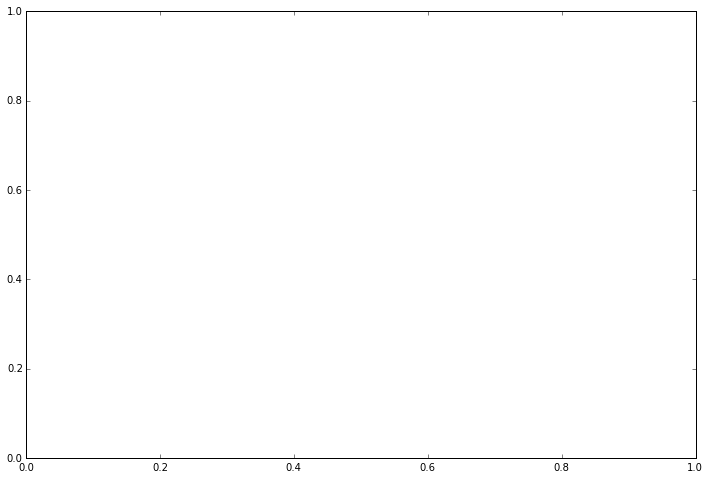

In [148]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index,
combined_trends.debtP, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index,
combined_trends.debtO, color='r')
plt.show()

Generating order signals

In [149]:
base = final.reset_index().set_index('GoogleWE')
base.drop(['DJIAClose'], inplace=True, axis=1)
base[:3]

ValueError: labels ['DJIAClose'] not contained in axis

In [150]:
base['PMA'] = pd.rolling_mean(base.debtP.shift(1), 3)
base['OMA'] = pd.rolling_mean(base.debtO.shift(1), 3)
base[:5]

AttributeError: 'DataFrame' object has no attribute 'debtP'

In [151]:
base['signal0'] = 0 # default to 0
base.loc[base.debtP > base.PMA, 'signal0'] = -1
base.loc[base.debtP < base.PMA, 'signal0'] = 1
base['signal1'] = 0

AttributeError: 'DataFrame' object has no attribute 'debtP'

In [152]:
base.loc[base.debtO > base.OMA, 'signal1'] = -1
base.loc[base.debtO < base.OMA, 'signal1'] = 1
base[['debtP', 'PMA', 'signal0', 'debtO', 'OMA', 'signal1']]

AttributeError: 'DataFrame' object has no attribute 'debtO'

In [154]:
base['PctChg'] = base.Close.pct_change().shift(-1)
base[['Close', 'PctChg', 'signal0', 'signal1']][:5]

AttributeError: 'DataFrame' object has no attribute 'Close'

In [155]:
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1','ret0', 'ret1']][:5]

AttributeError: 'DataFrame' object has no attribute 'PctChg'

# Cumulative returns and the result of the strategy

In [156]:
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1
base[['cumret0', 'cumret1']]

AttributeError: 'DataFrame' object has no attribute 'ret0'

In [157]:
base['cumret0'].plot(figsize=(12,4))

KeyError: 'cumret0'

In [158]:
data[['cumret0', 'cumret1']].plot(figsize=(12,4));

KeyError: "['cumret0' 'cumret1'] not in index"

Chap7 Algorithmic Trading

# Zipline to develop automated trading algorithms.
http://www.zipline.io

(https://www.quantopian.com/

In [159]:
import pandas as pd
import pandas.io.data as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 6)

In [162]:
msft = web.DataReader("MSFT", "yahoo",datetime(2000, 1, 1),datetime(2014, 12, 31))
msft[:5]


                Open     High       Low     Close    Volume  Adj Close
Date                                                                  
2000-01-03  117.3750  118.625  112.0000  116.5625  53228400  40.933045
2000-01-04  113.5625  117.125  112.2500  112.6250  54119000  39.550320
2000-01-05  111.1250  116.375  109.3750  113.8125  64059600  39.967333
2000-01-06  112.1875  113.875  108.3750  110.0000  54976600  38.628504
2000-01-07  108.6250  112.250  107.3125  111.4375  62013600  39.133308

In [163]:
msft['MA7'] = pd.rolling_mean(msft['Adj Close'], 7)
msft['MA30'] = pd.rolling_mean(msft['Adj Close'], 30)
msft['MA90'] = pd.rolling_mean(msft['Adj Close'], 90)
msft['MA120'] = pd.rolling_mean(msft['Adj Close'], 120)

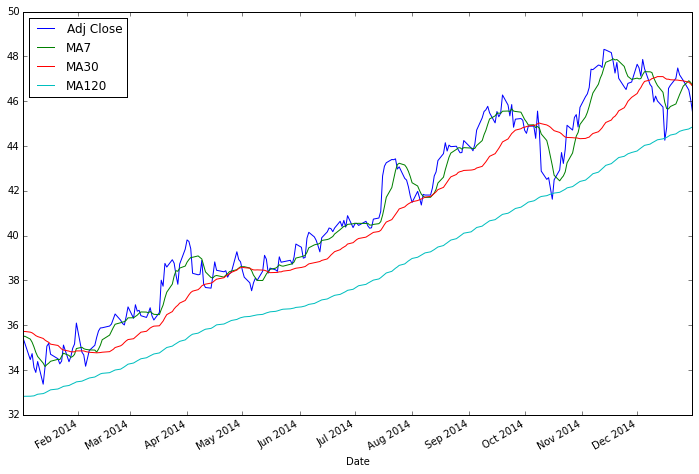

In [165]:
msft['2014'][['Adj Close', 'MA7','MA30', 'MA120']].plot(figsize=(12,8))

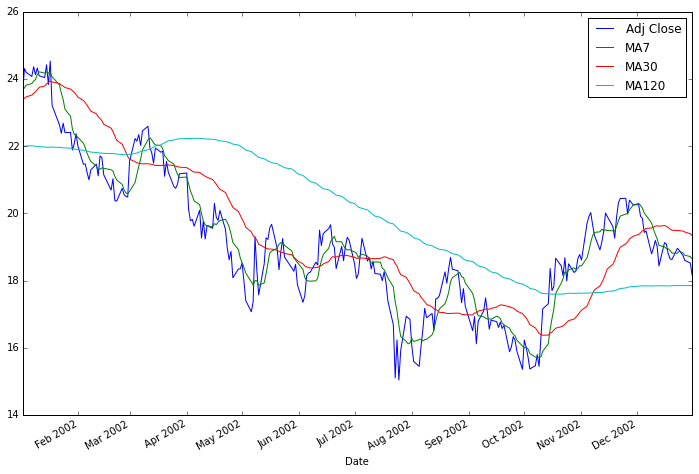

In [167]:
msft['2002'][['Adj Close', 'MA7','MA30', 'MA120']].plot(figsize=(12,8));

In [168]:
periods = 10
alpha = 2.0/(periods +1)
factors = (1-alpha) ** np.arange(1, 11)
sum_factors = factors.sum()
weights = factors/sum_factors
weights

array([ 0.21005616,  0.17186413,  0.14061611,  0.11504954,  0.09413145,
        0.07701664,  0.06301361,  0.05155659,  0.04218267,  0.03451309])

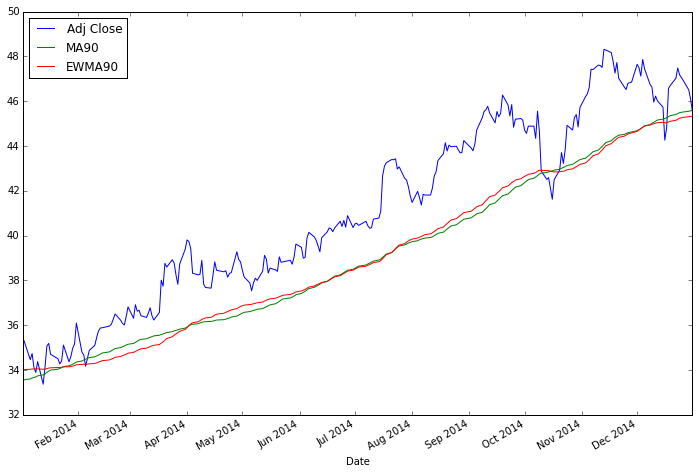

In [169]:
span = 90
msft_ewma = msft[['Adj Close']].copy()
msft_ewma['MA90'] = pd.rolling_mean(msft_ewma, span)
msft_ewma['EWMA90'] = pd.ewma(msft_ewma['Adj Close'],span=span)
msft_ewma['2014'].plot(figsize=(12, 8))

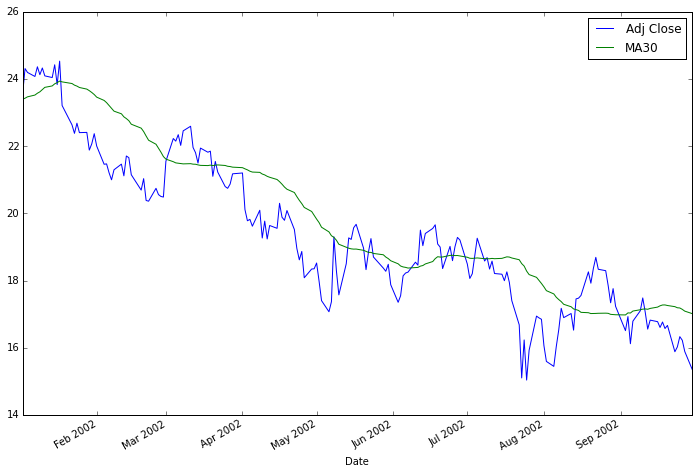

In [170]:
msft['2002-1':'2002-9'][['Adj Close','MA30']].plot(figsize=(12,8))

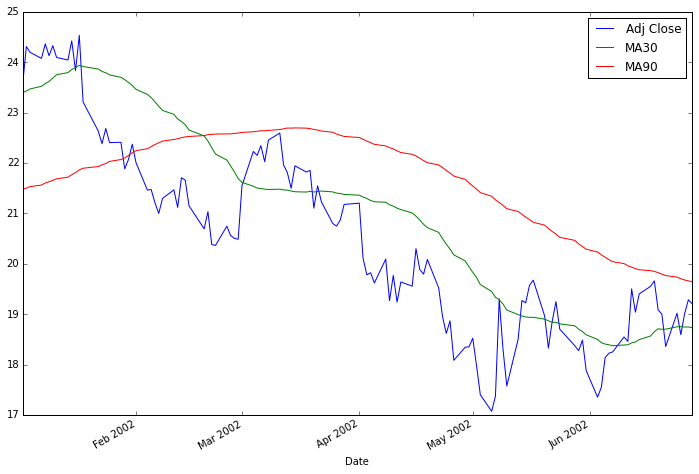

In [171]:
msft['2002-1':'2002-6'][['Adj Close', 'MA30', 'MA90']].plot(figsize=(12,8));

Algo trading with Zipline

In [184]:
class BuyApple(zp.TradingAlgorithm):
    trace=False
    def __init__(self, trace=False):
        BuyApple.trace = trace
        super(BuyApple, self).__init__()
    def initialize(context):
        if BuyApple.trace: print("---> initialize")
        if BuyApple.trace: print(context)
        if BuyApple.trace: print("<--- initialize")
    def handle_data(self, context):
        if BuyApple.trace: print("---> handle_data")
        if BuyApple.trace: print(context)
        self.order("AAPL", 1)
        if BuyApple.trace: print("<-- handle_data")

NameError: name 'zp' is not defined

In [185]:
import zipline.utils.factory as zpf

ImportError: No module named zipline.utils.factory

In [186]:
data = zpf.load_from_yahoo(stocks=['AAPL'],indexes={},start=datetime(1990, 1, 1),end=datetime(2014, 1, 1),adjusted=False)
data.plot(figsize=(12,8))

NameError: name 'zpf' is not defined

Working with Options

In [191]:
import pandas as pd
import numpy as np
import pandas.io.data as web
from datetime import datetime
import matplotlib.pyplot as plt
#%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 82)
pd.set_option('precision', 3)


In [192]:
aapl_options = web.Options('AAPL', 'yahoo')
aapl_options = aapl_options.get_all_data().reset_index()

ImportError: html5lib not found, please install it

In [193]:
aapl_options.to_csv('aapl_options.csv')

AttributeError: 'Options' object has no attribute 'to_csv'

In [194]:
aapl_options = pd.read_csv('aapl_options.csv',parse_dates=['Expiry'])

IOError: File aapl_options.csv does not exist

In [195]:
def get_historical_closes(ticker, start_date, end_date):
    p = web.DataReader(ticker, "yahoo", start_date, end_date)
    d = p.to_frame()['Adj Close'].reset_index()
    d.rename(columns={'minor': 'Ticker',
    'Adj Close': 'Close'}, inplace=True)
    pivoted = d.pivot(index='Date', columns='Ticker')
    pivoted.columns = pivoted.columns.droplevel(0)
    return pivoted

In [198]:
closes = get_historical_closes(['MSFT', 'AAPL', 'KO'],'2010-01-01', '2014-12-31')

In [199]:
closes[:5]

Ticker        AAPL      KO    MSFT
Date                              
2010-01-04  28.589  24.057  26.594
2010-01-05  28.638  23.766  26.603
2010-01-06  28.183  23.758  26.439
2010-01-07  28.130  23.699  26.164
2010-01-08  28.318  23.260  26.345

In [200]:
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1))

In [201]:
daily_returns = calc_daily_returns(closes)
daily_returns[:5]

Ticker       AAPL         KO       MSFT
Date                                   
2010-01-04    NaN        NaN        NaN
2010-01-05  0.002 -1.217e-02  3.230e-04
2010-01-06 -0.016 -3.549e-04 -6.156e-03
2010-01-07 -0.002 -2.489e-03 -1.045e-02
2010-01-08  0.007 -1.868e-02  6.873e-03

In [202]:
def calc_annual_returns(daily_returns):
    grouped = np.exp(daily_returns.groupby(lambda date: date.year).sum())-1
    return grouped

In [203]:
annual_returns = calc_annual_returns(daily_returns)
annual_returns

Ticker   AAPL     KO   MSFT
2010    0.507  0.189 -0.079
2011    0.256  0.095 -0.045
2012    0.326  0.065  0.058
2013    0.081  0.172  0.443
2014    0.406  0.053  0.276

In [205]:
def calc_portfolio_var(returns, weights=None):
    if (weights is None):
        weights = np.ones(returns.columns.size) /  returns.columns.size
        sigma = np.cov(returns.T,ddof=0)
        var = (weights * sigma * weights.T).sum()
        return var

In [206]:
calc_portfolio_var(annual_returns)

0.0028795410447509133

In [210]:
def sharpe_ratio(returns, weights = None, risk_free_rate = 0.015):
    n = returns.columns.size
    if weights is None: 
        weights = np.ones(n)/n
    var = calc_portfolio_var(returns, weights)
    means = returns.mean()
    return (means.dot(weights) - risk_free_rate)/np.sqrt(var)

In [211]:
Sharpe_ratio(returns)

NameError: name 'Sharpe_ratio' is not defined